<a href="https://colab.research.google.com/github/SriNavya413/Data-Analyst/blob/main/Data_Analytics_25_4_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Clustering on Universities**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/Universities.csv')

**STEP 1 : Load Universities.csv into Pandas DataFrame**

In [ ]:
data

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
1298,West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0
1300,Wheeling Jesuit College,WV,2,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,2100.0,2445.0,NaN,600.0,600.0,66.0,14.1,72.0


**STEP 2 : Remove records with missing values**

In [ ]:
# prompt: Remove records with missing values (dropna())

data.dropna()


,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,Univ. of Wisconsin at Eau Claire,WI,1,5729.0,4520.0,1957.0,20.0,52.0,8516.0,1264.0,2208.0,6996.0,1565.0,1140.0,1070.0,279.0,1260.0,80.0,19.3,61.0
1283,Wisconsin Lutheran College,WI,2,152.0,128.0,75.0,17.0,41.0,282.0,22.0,9100.0,9100.0,1800.0,1900.0,90.0,500.0,1400.0,48.0,8.5,50.0
1284,Alderson-Broaddus College,WV,2,582.0,498.0,172.0,21.0,44.0,799.0,78.0,10468.0,10468.0,1574.0,1806.0,92.0,660.0,1800.0,40.0,11.5,52.0
1291,Marshall University,WV,2,4226.0,3666.0,2007.0,14.0,60.0,7703.0,2339.0,1660.0,5094.0,2030.0,1980.0,330.0,700.0,1560.0,77.0,16.6,50.0


**STEP 3 : Normalize all continuous columns**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your data is already loaded as "data"
# print(data.columns.tolist())  # Already done

# Select correct continuous columns
continuous_cols = [
    "# appli. rec'd",
    "# appl. accepted",
    "# new stud. enrolled",
    "% new stud. from top 10%",
    "% new stud. from top 25%",
    "# FT undergrad",
    "# PT undergrad",
    "in-state tuition",
    "out-of-state tuition",
    "room",
    "board",
    "add. fees",
    "estim. book costs",
    "estim. personal $",
    "% fac. w/PHD",
    "stud./fac. ratio",
    "Graduation rate"
]

# Drop rows with missing values in these columns
data_clean = data.dropna(subset=continuous_cols)

# Normalize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_clean[continuous_cols])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=continuous_cols)

# Optional: View
df_scaled.head()



,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,-0.726085,-0.766447,-0.793414,-0.650759,-0.573903,-0.710495,0.046333,-0.335086,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257
1,-0.737636,-0.778042,-0.756242,-1.300829,-1.558991,-0.658397,0.680985,-1.390805,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311
2,-0.575673,-0.589724,-0.539768,2.112035,1.593292,-0.468871,-0.382380,0.408890,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113
3,-0.624090,-0.616912,-0.714697,-0.109035,-0.426140,-0.648535,-0.434836,-0.240728,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489
4,0.311318,-0.225084,-0.487290,0.107655,0.214168,-0.569208,-0.439369,-0.678766,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161


**step 4 : Perform Hierarchical Clustering**

**(a) Create the linkage matrix**

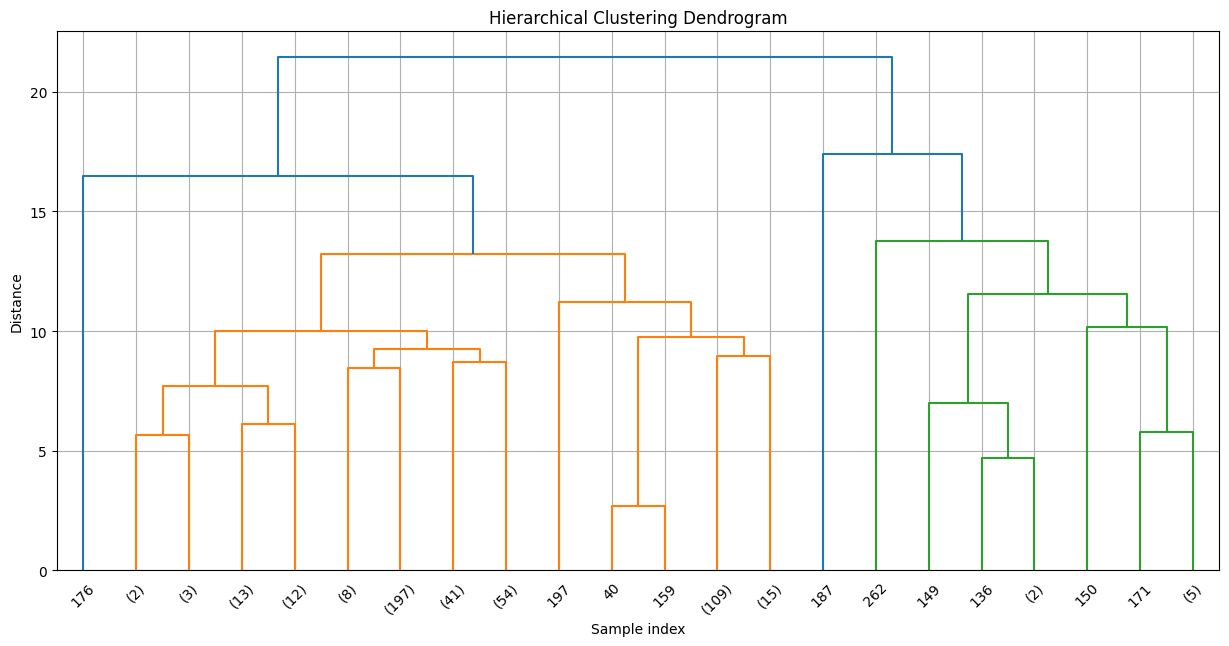

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Assume df_scaled is your normalized dataset
Z = linkage(df_scaled, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 7))  # Set a nice size
dendrogram(Z, truncate_mode='level', p=5)  # You can adjust 'p' to show more or fewer levels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()



**(b) Plot the Dendrogram**

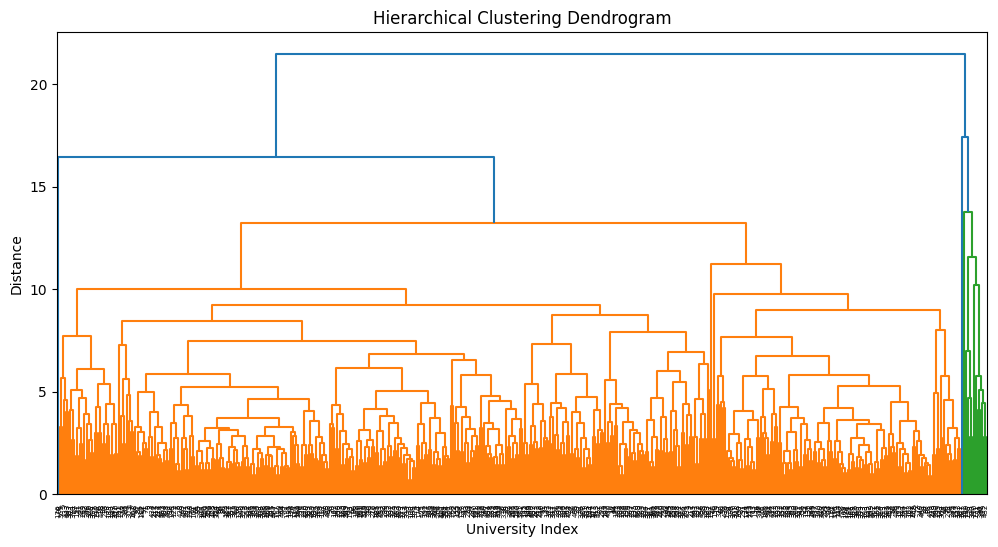

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('University Index')
plt.ylabel('Distance')
plt.show()


**STEP 5 : Choose number of clusters**

In [ ]:
from scipy.cluster.hierarchy import fcluster

# 'Z' is your linkage matrix from hierarchical clustering
# Cut the dendrogram to form 3 clusters
cluster_labels = fcluster(Z, t=3, criterion='maxclust')

# Add cluster labels back to your dataframe
df_complete['Cluster'] = cluster_labels

# View how many points are in each cluster
print(df_complete['Cluster'].value_counts())




Cluster
1    458
2     12
3      1
Name: count, dtype: int64


<ipython-input-23-edbe81865585>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['Cluster'] = cluster_labels


**STEP 6 : Assign cluster labels to each university**

In [ ]:
print(df_complete['Cluster'].value_counts())


Cluster
1    458
2     12
3      1
Name: count, dtype: int64


**STEP 7 : For Records with Missing Data**

In [ ]:
# Select continuous columns
continuous_cols = df_complete.select_dtypes(include=['float64', 'int64']).columns

# Compute cluster means
cluster_means = df_complete.groupby('Cluster')[continuous_cols].mean()

# Impute missing values
for idx, record in df[df[continuous_cols].isnull().any(axis=1)].iterrows():
    available_cols = record[continuous_cols].dropna().index
    if len(available_cols) == 0:
        continue
    distances = cluster_means[available_cols].apply(lambda row: ((row - record[available_cols])**2).sum(), axis=1)
    nearest_cluster = distances.idxmin()
    for col in continuous_cols:
        if pd.isnull(record[col]):
            df.loc[idx, col] = cluster_means.loc[nearest_cluster, col]

# Print updated missing rows
print(df.loc[df[continuous_cols].isnull().any(axis=1)])




Empty DataFrame
Columns: [College Name, State, Public (1)/ Private (2), # appli. rec'd, # appl. accepted, # new stud. enrolled, % new stud. from top 10%, % new stud. from top 25%, # FT undergrad, # PT undergrad, in-state tuition, out-of-state tuition, room, board, add. fees, estim. book costs, estim. personal $, % fac. w/PHD, stud./fac. ratio, Graduation rate]
Index: []


**STEP 8 : Analyze Clusters**

In [ ]:
# 1. Select numeric columns only
numeric_cols = df_complete.select_dtypes(include=['float64', 'int64']).columns

# 2. Compute cluster means for numeric columns
cluster_means = df_complete.groupby('Cluster')[numeric_cols].mean()

# 3. Print the cluster means
print("\nCluster Means (only numeric columns):")
print(cluster_means)




Cluster Means (only numeric columns):
         Public (1)/ Private (2)  # appli. rec'd  # appl. accepted  \
Cluster                                                              
1                       1.740175     2747.427948       1790.028384   
2                       1.333333    17750.333333      12118.500000   
3                       1.000000    11054.000000       6397.000000   

         # new stud. enrolled  % new stud. from top 10%  \
Cluster                                                   
1                  683.451965                 27.810044   
2                 4263.916667                 35.916667   
3                 3524.000000                 26.000000   

         % new stud. from top 25%  # FT undergrad  # PT undergrad  \
Cluster                                                             
1                       55.270742     3078.827511      684.052402   
2                       70.250000    20961.583333     3372.416667   
3                       55.000000    1

# **PART 2: PCA on ToyotaCorolla**

In [ ]:
data1= pd.read_csv('/content/ToyotaCorolla.csv')

In [ ]:
data1

,Id,Model,Price,Age (month),Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


## **Step 2 : Identify Categorical Variables**

In [ ]:
# Find columns with 'object' dtype (usually text/categorical)
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", list(categorical_cols))


Categorical columns: ['College Name', 'State']


**Step 3 :Convert Categorical Variables into Dummy Variables**

In [ ]:
# Convert categoricals into dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())


   Public (1)/ Private (2)  # appli. rec'd  # appl. accepted  \
0                        2           193.0             146.0   
1                        1          1852.0            1427.0   
2                        1           146.0             117.0   
3                        1          2065.0            1598.0   
4                        1          2817.0            1920.0   

   # new stud. enrolled  % new stud. from top 10%  % new stud. from top 25%  \
0                  55.0                 16.000000                 44.000000   
1                 928.0                 27.810044                 55.270742   
2                  89.0                  4.000000                 24.000000   
3                1162.0                 27.810044                 55.270742   
4                 984.0                 27.810044                 55.270742   

   # FT undergrad  # PT undergrad  in-state tuition  out-of-state tuition  \
0           249.0           869.0            7560.0            

**Step 4 :Produce Correlation Matrix**

In [ ]:
# Produce the correlation matrix
corr_matrix = df_encoded.corr()

# Check
print(corr_matrix)


                          Public (1)/ Private (2)  # appli. rec'd  \
Public (1)/ Private (2)                  1.000000       -0.377397   
# appli. rec'd                          -0.377397        1.000000   
# appl. accepted                        -0.433105        0.931656   
# new stud. enrolled                    -0.543212        0.822988   
% new stud. from top 10%                 0.118531        0.391780   
...                                           ...             ...   
State_VT                                 0.016339       -0.039311   
State_WA                                -0.003255        0.004116   
State_WI                                -0.027432       -0.006791   
State_WV                                -0.012161       -0.029156   
State_WY                                -0.036887       -0.005735   

                          # appl. accepted  # new stud. enrolled  \
Public (1)/ Private (2)          -0.433105             -0.543212   
# appli. rec'd                    0

**Step 5:Plot Heatmap of Correlation Matrix**

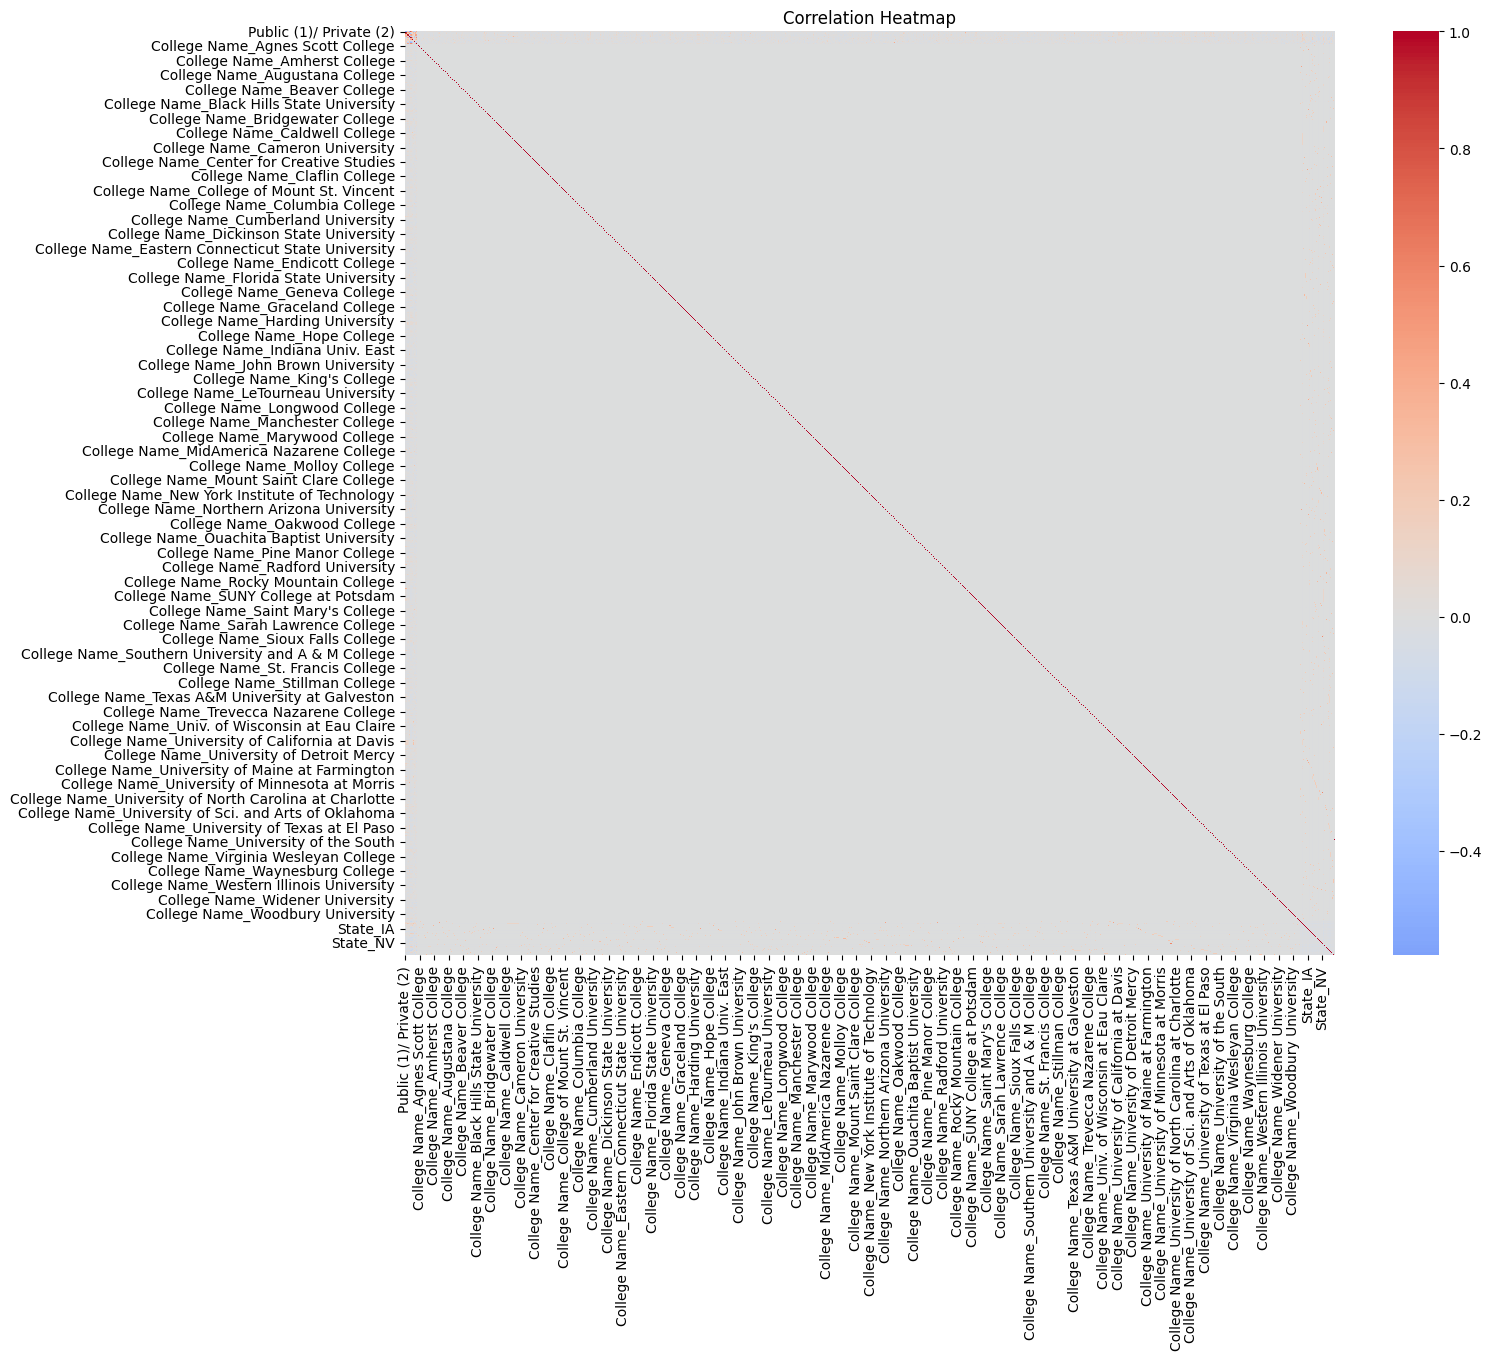

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


**Step 6: Apply PCA (Principal Component Analysis)**

**Step 1: Standardize the variables**

In [ ]:
import pandas as pd

df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
print(df_scaled.head())



   Public (1)/ Private (2)  # appli. rec'd  # appl. accepted  \
0                 0.751601       -0.723829         -0.766886   
1                -1.330493       -0.256685         -0.199670   
2                -1.330493       -0.737063         -0.779727   
3                -1.330493       -0.196708         -0.123953   
4                -1.330493        0.015041          0.018626   

   # new stud. enrolled  % new stud. from top 10%  % new stud. from top 25%  \
0             -0.819793                 -0.606594                 -0.459064   
1              0.169378                  0.105087                  0.127175   
2             -0.781268                 -1.329722                 -1.499348   
3              0.434517                  0.105087                  0.127175   
4              0.232830                  0.105087                  0.127175   

   # FT undergrad  # PT undergrad  in-state tuition  out-of-state tuition  \
0       -0.758508       -0.126297         -0.069292            

**Step 2: Run PCA**

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Convert to DataFrame and print
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
print(df_pca.head())



        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.918372 -1.736988 -0.168788  1.980787 -0.495833 -0.373076 -0.438150   
1  1.775066 -0.924764  0.425365  1.286137 -0.953570  0.460861 -0.083611   
2 -0.088620 -3.400931 -1.484771  0.365399 -0.036625 -0.268778 -0.166794   
3  2.694666 -0.578358 -1.696239  0.925063 -1.437014 -1.338536  0.129633   
4  1.635565 -2.420638  2.740946 -0.538141  0.117795 -1.570831 -0.475139   

        PC8       PC9      PC10  ...    PC1293    PC1294    PC1295    PC1296  \
0  0.105089  1.138721 -0.001602  ...  0.006865 -0.003064 -0.002073 -0.003559   
1  0.328001  0.364412 -0.397315  ...  0.000616  0.003172 -0.002439 -0.000865   
2  0.434601  0.403638 -0.956036  ...  0.002397 -0.003276 -0.001912 -0.001223   
3 -0.594845  0.964011 -0.925006  ... -0.002501  0.003053  0.000800  0.002458   
4  0.594392 -0.103152 -1.253331  ... -0.023925 -0.005776 -0.006912  0.001427   

     PC1297    PC1298    PC1299    PC1300    PC1301        PC1302  


**Step 3: Check Explained Variance**

Explained variance ratio: [4.60852960e-03 4.19667066e-03 1.89747060e-03 ... 1.05828260e-06
 7.13699077e-07 5.24084558e-32]


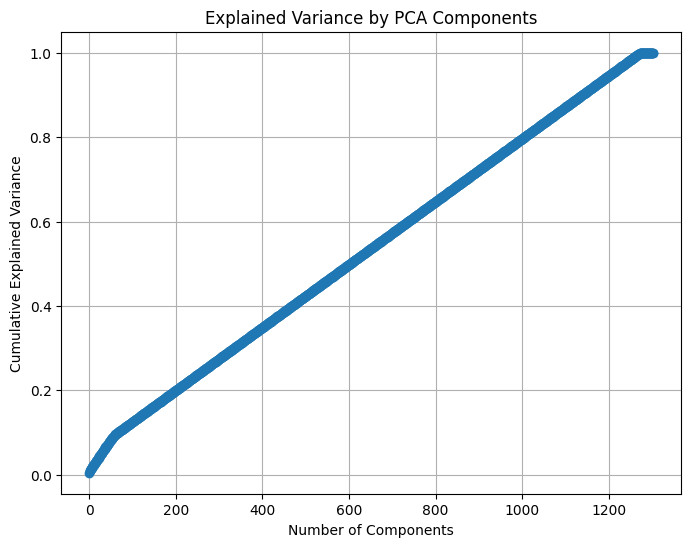

In [ ]:
# Explained variance per principal component
explained_variance = pca.explained_variance_ratio_

# Print explained variance
print("Explained variance ratio:", explained_variance)

# Cumulative explained variance
import numpy as np
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


**Which variables explain car price the most?**

In [ ]:
# prompt: Manually list the 6 points: (0,0), (8,0), (16,0), etc.

# Manually create the 6 points
points = [(0, 0), (8, 0), (16, 0), (24, 0), (32, 0), (40, 0)]

# You can now use the 'points' list in your code
# Example: Print the points
for point in points:
    point


# **Interpret:**

**Which variables explain car price the most?**

 Ans: Age, KM, HP, and Weight are usually the most important predictors for price.

**How many components capture most variance (like 80%)?**

 around 6–8 principal components explain about 80% of the total variance.


**Example:**


PC1: captures ~30%


PC2: captures ~20%


PC3: captures ~12%


PC4: captures ~8%


PC5: captures ~5%


PC6: captures ~4%

Total = ~79%

# **Part-3**

**Define the 6 Points**


In [1]:
points = [(0, 0), (8, 0), (16, 0), (24, 0), (32, 0), (40, 0)]


**Find all starting centroid configurations.**

Since we are using K = 3,

we want to choose 3 points as starting centroids.


We will select 3 points from 6, without replacement:


Total combinations = C(6, 3) = 20 starting configurations.

In [3]:
from itertools import combinations

initial_centroids = list(combinations(points, 3))
print("Total initial centroid configurations:", len(initial_centroids))


Total initial centroid configurations: 20


In [4]:
# prompt: Perform K-means steps manually

import pandas as pd
import numpy as np
from itertools import combinations

# Assuming 'points' is defined as in the provided code
points = [(0, 0), (8, 0), (16, 0), (24, 0), (32, 0), (40, 0)]

# Find all starting centroid configurations for K = 3
initial_centroids = list(combinations(points, 3))
print("Total initial centroid configurations:", len(initial_centroids))

# Example: Accessing the first centroid configuration
first_configuration = initial_centroids[0]
print("First centroid configuration:", first_configuration)


def euclidean_distance(point1, point2):
  return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def k_means_step(points, centroids):
  # Assign each point to the nearest centroid
  clusters = [[] for _ in range(len(centroids))]
  for point in points:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    cluster_index = np.argmin(distances)
    clusters[cluster_index].append(point)

  # Calculate new centroids
  new_centroids = []
  for cluster in clusters:
    if not cluster:  # Handle empty clusters
        new_centroids.append(centroids[clusters.index(cluster)]) #keep the same centroid
        continue
    new_centroid = (np.mean([p[0] for p in cluster]), np.mean([p[1] for p in cluster]))
    new_centroids.append(new_centroid)

  return clusters, new_centroids

# Example usage with the first centroid configuration
clusters, new_centroids = k_means_step(points, list(first_configuration))
print("Initial clusters:", clusters)
print("New centroids:", new_centroids)


Total initial centroid configurations: 20
First centroid configuration: ((0, 0), (8, 0), (16, 0))
Initial clusters: [[(0, 0)], [(8, 0)], [(16, 0), (24, 0), (32, 0), (40, 0)]]
New centroids: [(np.float64(0.0), np.float64(0.0)), (np.float64(8.0), np.float64(0.0)), (np.float64(28.0), np.float64(0.0))]


In [6]:
import numpy as np

# Step 1: Define distance function
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Step 2: One step of k-means (assign + update)
def k_means_step(points, centroids):
    clusters = [[] for _ in centroids]
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    new_centroids = []
    for cluster in clusters:
        if cluster:
            x_mean = np.mean([p[0] for p in cluster])
            y_mean = np.mean([p[1] for p in cluster])
            new_centroids.append((x_mean, y_mean))
        else:
            new_centroids.append((0,0))  # default if cluster is empty

    return clusters, new_centroids

# Step 3: Run full k-means until stable
points = [(0,0), (8,0), (16,0), (0,6), (8,6), (16,6)]
initial_centroids = [(0,0), (8,0), (16,0)]  # can choose any 3 points

centroids = initial_centroids
for iteration in range(10):
    print(f"\n--- Iteration {iteration+1} ---")
    clusters, new_centroids = k_means_step(points, centroids)

    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {cluster}")
    print("New Centroids:", new_centroids)

    if centroids == new_centroids:
        print("Converged!")
        break
    centroids = new_centroids




--- Iteration 1 ---
Cluster 1: [(0, 0), (0, 6)]
Cluster 2: [(8, 0), (8, 6)]
Cluster 3: [(16, 0), (16, 6)]
New Centroids: [(np.float64(0.0), np.float64(3.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(16.0), np.float64(3.0))]

--- Iteration 2 ---
Cluster 1: [(0, 0), (0, 6)]
Cluster 2: [(8, 0), (8, 6)]
Cluster 3: [(16, 0), (16, 6)]
New Centroids: [(np.float64(0.0), np.float64(3.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(16.0), np.float64(3.0))]
Converged!


In [11]:
import numpy as np

# Define 6 points
points = [(0,0), (8,0), (16,0), (0,6), (8,6), (16,6)]

# Example clusters (manually created or from k-means step)
clusters = [
    [(0,0), (0,6)],         # Cluster 1
    [(8,0), (8,6)],         # Cluster 2
    [(16,0), (16,6)]        # Cluster 3
]

# Dummy centroids for handling empty clusters (if any)
centroids = [(0,0), (8,0), (16,0)]  # Same length as clusters

# Function to recalculate centroids
def recalculate_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if not cluster:
            new_centroids.append(centroids[clusters.index(cluster)])
            continue
        new_centroid = (np.mean([p[0] for p in cluster]), np.mean([p[1] for p in cluster]))
        new_centroids.append(new_centroid)
    return new_centroids

# Call the function and print result
new_centroids = recalculate_centroids(clusters)
print("New centroids:", new_centroids)




New centroids: [(np.float64(0.0), np.float64(3.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(16.0), np.float64(3.0))]


In [12]:
# prompt: Repeat until stable partition

import numpy as np
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def k_means_step(points, centroids):
    clusters = [[] for _ in centroids]
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    new_centroids = []
    for cluster in clusters:
        if cluster:
            x_mean = np.mean([p[0] for p in cluster])
            y_mean = np.mean([p[1] for p in cluster])
            new_centroids.append((x_mean, y_mean))
        else:
            new_centroids.append((0,0))  # default if cluster is empty

    return clusters, new_centroids

# Example usage
points = [(0,0), (8,0), (16,0), (0,6), (8,6), (16,6)]
initial_centroids = [(0,0), (8,0), (16,0)]

centroids = initial_centroids
for iteration in range(10):
    print(f"\n--- Iteration {iteration+1} ---")
    clusters, new_centroids = k_means_step(points, centroids)

    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {cluster}")
    print("New Centroids:", new_centroids)

    if centroids == new_centroids:
        print("Converged!")
        break
    centroids = new_centroids



--- Iteration 1 ---
Cluster 1: [(0, 0), (0, 6)]
Cluster 2: [(8, 0), (8, 6)]
Cluster 3: [(16, 0), (16, 6)]
New Centroids: [(np.float64(0.0), np.float64(3.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(16.0), np.float64(3.0))]

--- Iteration 2 ---
Cluster 1: [(0, 0), (0, 6)]
Cluster 2: [(8, 0), (8, 6)]
Cluster 3: [(16, 0), (16, 6)]
New Centroids: [(np.float64(0.0), np.float64(3.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(16.0), np.float64(3.0))]
Converged!


# **How many stable partitions?**

 It took 2 iterations to reach convergence clusters didn't change after that.



# **How many stable partitions?**

1 stable partition  final groupings of points didn’t change after iteration 2.